<a href="https://colab.research.google.com/github/NguyenKiet2k2/AI/blob/main/20146500_VN_Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
%cd /content/drive/MyDrive/VN_Banknotes/

/content/drive/MyDrive/VN_Banknotes


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/VN_Banknotes/MONEY_DATA', target_size=(120,120), batch_size=32, class_mode='categorical')

Found 75 images belonging to 7 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100k': 0, '10k': 1, '200k': 2, '20k': 3, '500k': 4, '50k': 5, '5k': 6}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(120,120,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(7,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [ ]:
a = model.fit_generator( training_set, epochs=60, steps_per_epoch=len(training_set))

<ipython-input-29-4ec58c8ad794>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, epochs=60, steps_per_epoch=len(training_set))


Epoch 1/60
3/3 [==============================] - 9s 2s/step - loss: 24.3423 - accuracy: 0.1733
Epoch 2/60
3/3 [==============================] - 3s 1s/step - loss: 14.8261 - accuracy: 0.1067
Epoch 3/60
3/3 [==============================] - 2s 803ms/step - loss: 3.3876 - accuracy: 0.1867
Epoch 4/60
3/3 [==============================] - 2s 515ms/step - loss: 2.0473 - accuracy: 0.2400
Epoch 5/60
3/3 [==============================] - 3s 1s/step - loss: 1.7229 - accuracy: 0.2933
Epoch 6/60
3/3 [==============================] - 2s 790ms/step - loss: 1.2916 - accuracy: 0.5067
Epoch 7/60
3/3 [==============================] - 2s 604ms/step - loss: 1.1421 - accuracy: 0.6667
Epoch 8/60
3/3 [==============================] - 2s 519ms/step - loss: 0.9498 - accuracy: 0.6267
Epoch 9/60
3/3 [==============================] - 3s 1s/step - loss: 0.8663 - accuracy: 0.6400
Epoch 10/60
3/3 [==============================] - 3s 891ms/step - loss: 0.6225 - accuracy: 0.8133
Epoch 11/60
3/3 [============

In [ ]:
model.save('/content/drive/MyDrive/VN_Banknotes/MONEY_DATA/MONEY_DATA.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.005238852463662624
Train Accuracy 1.0


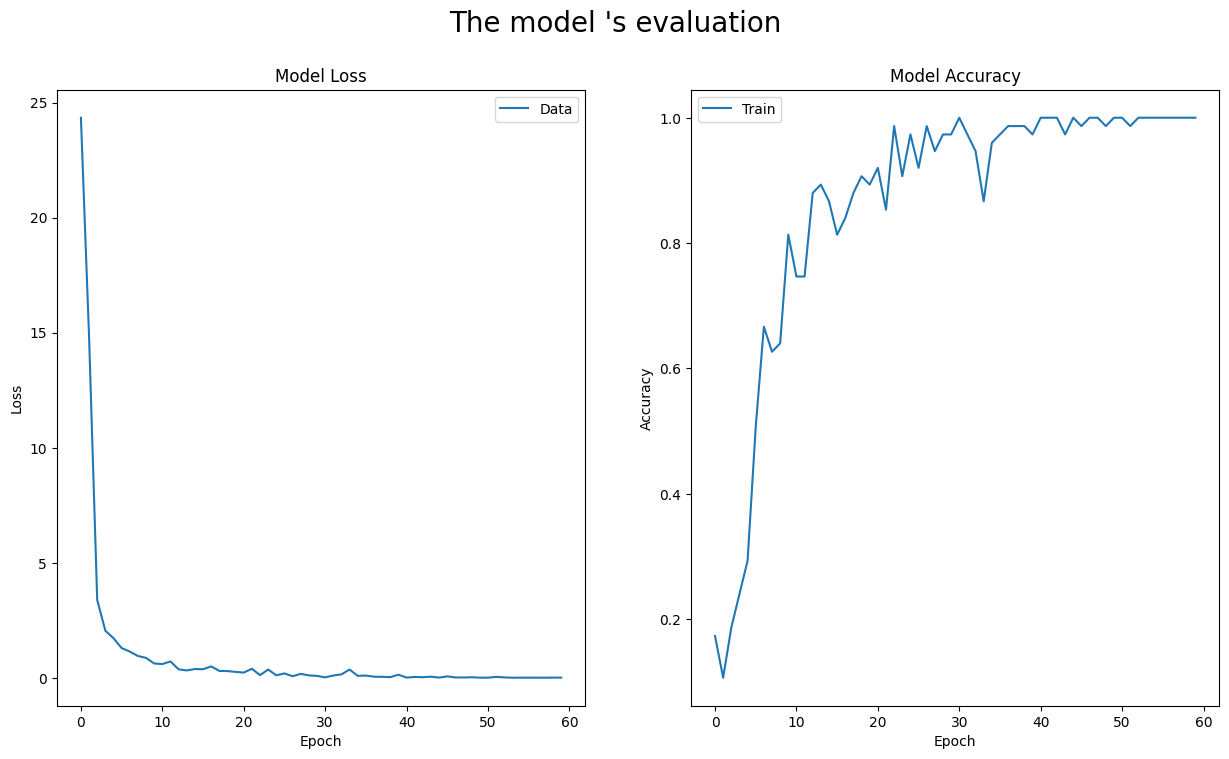

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(a.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(a.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model1= load_model('/content/drive/MyDrive/VN_Banknotes/MONEY_DATA/MONEY_DATA.h5')

1/1 [==============================] - 0s 31ms/step
Đây là mệnh giá : 500000 VND


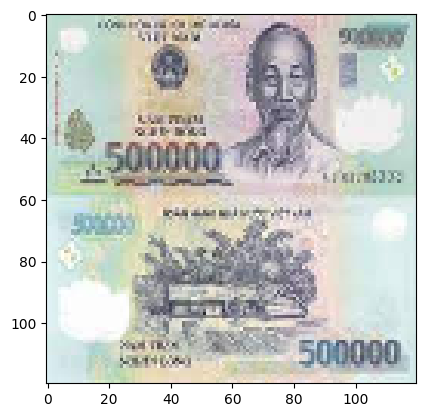

1/1 [==============================] - 0s 26ms/step
Đây là mệnh giá : 500000 VND


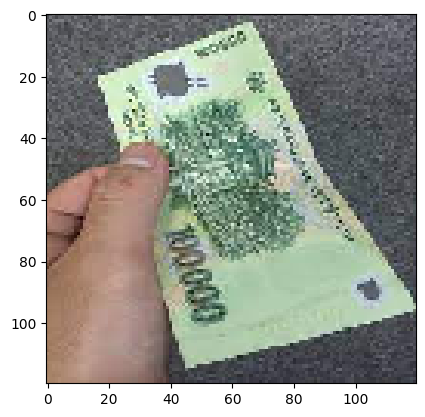

1/1 [==============================] - 0s 27ms/step
Đây là mệnh giá : 200000 VND


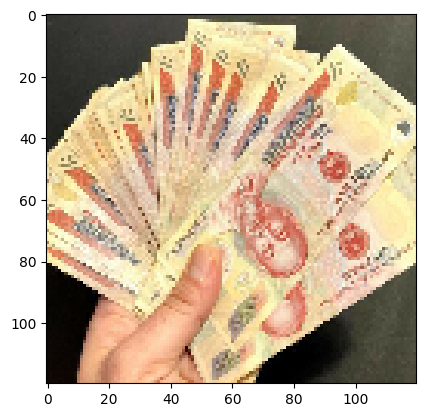

1/1 [==============================] - 0s 25ms/step
Đây là mệnh giá : 200000 VND


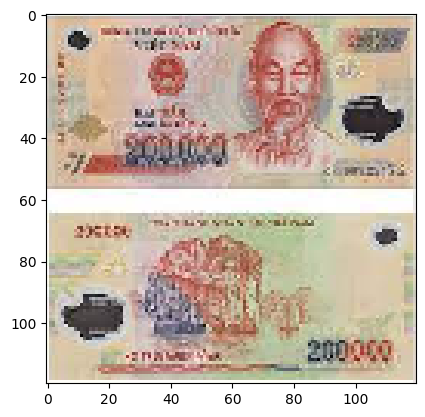

In [ ]:
folder='/content/drive/MyDrive/VN_Banknotes/MONEY_DATA/TEST/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(120,120))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['100000 VND', '10000 VND', '200000 VND', '20000 VND', '500000 VND', '50000 VND','5000 VND']
  print('Đây là mệnh giá : {}'.format(class_name[result]))
  plt.show()